In [99]:
import pandas as pd
import numpy as np
import scipy.stats

In [116]:
df_port=pd.read_csv('preciosportf.csv')

In [101]:
w=np.random.random(5)
w=w/np.sum(w)

In [121]:
df_port2=df_port[df_port.keys()[1:]]
date_index = pd.to_datetime(df_port['DATE'])
df_port2.index=date_index
df3=df_port2.astype('float').pct_change(periods=1)
df3.head(3)

,ASURB MF Equity,GFNORTEO MF Equity,PE&OLES* MF Equity,WALMEX* MF Equity,IENOVA* MF Equity
DATE,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-04-01,-0.022961,-0.033688,-0.007448,-0.014946,0.008847
2016-05-01,-0.022074,-0.000763,0.003127,-0.004202,-0.020554


In [122]:
S=df3.cov()

In [123]:
rend=df_port
rendimiento_esperado_portafolio=np.dot(w,df3.mean())*252
print(rendimiento_esperado_portafolio)

0.094933250047614


# Machine Learning

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [25]:
X=np.linspace(-1,1,100)+np.random.uniform(100)*.6
y=3*X+1+np.random.randn(100)

In [13]:
X=X[:,np.newaxis]
y=y[:,np.newaxis]

In [14]:
y.T@(inv(X@X.T)@X)

array([[178.9132537]])

In [35]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [17]:
#Siempre instancias la clase LinearRegression primero
'''
La siguiente linea siempre se escribe cuando trabajamos 
con regresiones lineares!!!
'''
lr=LinearRegression()
lr.fit(X.reshape(100,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

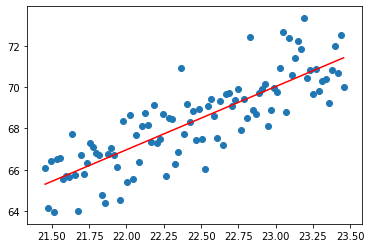

In [22]:
xrange=np.linspace(X.max(),X.min(),100).reshape(100,1)
yhat=lr.predict(xrange)
plt.plot(xrange,yhat,c="r")
plt.scatter(X,y)
plt.show()

In [ ]:
X=np.linspace(-1,1,100)+np.random.uniform(100)*.6
X.reshape(100,1)
X=np.c_[X,X**2]

In [44]:
X.shape

(100, 2)

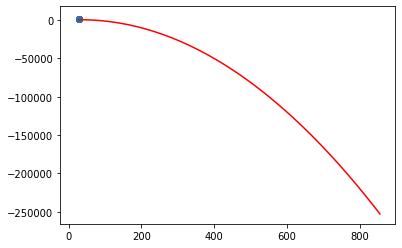

In [45]:
lr=LinearRegression()
lr.fit(X,y)
xrange=np.linspace(X.min(),X.max(),100).reshape(100,1)
xr=np.c_[xrange,xrange**2]
yhat=lr.predict(xr)
plt.plot(xrange,yhat,c="r")
plt.scatter(X[:,0],X[:,1].reshape(100,1))
plt.show()

In [48]:
X=np.linspace(-1,1,100)
y=6+3*X-5*X**2+2.4*X**3+np.random.randn(100)+0.8

In [49]:
poly=PolynomialFeatures(degree=2,include_bias=False)
Xt=poly.fit_transform(X[:,np.newaxis])
lr=LinearRegression()
lr.fit(Xt,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Librerías que necesitas para hacer regresiones

In [50]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [51]:
X=np.linspace(-1,1,100)
y=6+3*X-5*X**2+2.4*X**3+np.random.randn(100)+0.8

Modelo

In [52]:
pipe=Pipeline([
    ("Polytransform",PolynomialFeatures(degree=2,include_bias=False)),
    ("linear_model",LinearRegression())
])
pipe.fit(X[:,np.newaxis],y)

Pipeline(memory=None,
         steps=[('Polytransform',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear_model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [77]:
x_train=np.linspace(-1,1,100)+np.random.uniform(size=100)
x_test=np.linspace(-1,1,20)
def y_make(x):
    n_input=len(x)
    y=6+3*x-5*x**2+2.4*x**3+np.random.randn(n_input)+0.8
    return y
y_train=y_make(x_train)
y_test=y_make(x_test)

In [78]:
pipe=Pipeline([
    ("Polytransform",PolynomialFeatures(degree=2,include_bias=False)),
    ("linear_model",LinearRegression())
])
pipe.fit(x_train[:,np.newaxis],y_train)

Pipeline(memory=None,
         steps=[('Polytransform',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear_model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [79]:
pipe.score(x_train.reshape(100,1),y_train)

0.5883386147755549

In [59]:
from sklearn.metrics import mean_squared_error

In [80]:
yhat_train=pipe.predict(x_train.reshape(100,1))
yhat_test=pipe.predict(x_test.reshape(20,1))

In [81]:
mean_squared_error(y_train,yhat_train)
mean_squared_error(y_test,yhat_test)

3.2459609915475043

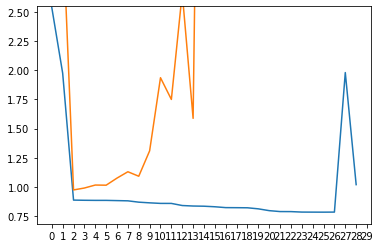

In [97]:
def make_pipe(deg,x,y):
    pipe=Pipeline([
            ("Polytransform",PolynomialFeatures(degree=deg,include_bias=False)),
            ("linear_model",LinearRegression())
    ])
    
    pipe.fit(x[:,np.newaxis],y)
    
    return pipe
J_tr=[]
J_tt=[]
for g in range(1,30):
    pipe=make_pipe(g,x_train,y_train)
    yhat_train=pipe.predict(x_train.reshape(100,1))
    yhat_test=pipe.predict(x_test.reshape(20,1))
    err_tr=mean_squared_error(y_train,yhat_train)
    err_tt=mean_squared_error(y_test,yhat_test)
    J_tr.append(err_tr)
    J_tt.append(err_tt)

plt.plot(J_tr)
plt.plot(J_tt)
plt.ylim(min(J_tr)-1e-1,max(J_tr)+1e-2)
plt.xticks(range(30))
plt.show()
    